# Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Import files
Import test and train files
drop unnamed columns


In [4]:
path_train = "C:\\CSE\\Logistic_regression\\Gotem Pumpkins.csv"
path_test="C:\\CSE\\Logistic_regression\\Freyja_Pumpkins.csv"
train_file = pd.read_csv(path_train)
test_file = pd.read_csv(path_test)

# Drop unnecessary columns 
train_file = train_file.drop(columns=["Unnamed: 0"], errors="ignore")
test_file = test_file.drop(columns=["Unnamed: 0"], errors="ignore")

# Categorize
As there are two types of pumpkin categorise them into two types one represented by 1 and other 0.


In [22]:

def type(name):
    if name == "Ürgüp Sivrisi":
        return 1
    else:
        return 0

cats = ["Class"]
train_file[cats] = train_file[cats].map(type)
test_file[cats] = test_file[cats].map(type)


# Correlation
It can be seen Convex_Area, Equiv_Diameter, Compactness, Perimeter have high corelation with Area so they can be dropped. 
while Aspect_Ration has low correlation with Class so it can be dropped

                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.930120           0.793882           0.689095   
Perimeter          0.930120   1.000000           0.948051           0.400400   
Major_Axis_Length  0.793882   0.948051           1.000000           0.112192   
Minor_Axis_Length  0.689095   0.400400           0.112192           1.000000   
Convex_Area        0.999798   0.931543           0.793849           0.689401   
Equiv_Diameter     0.998535   0.929545           0.792010           0.693495   
Eccentricity       0.168770   0.469946           0.705272          -0.579354   
Solidity           0.169039   0.076395           0.126520           0.100111   
Extent            -0.003753  -0.121404          -0.193530           0.226474   
Roundness         -0.145632  -0.494012          -0.677444           0.558198   
Aspect_Ration      0.166356   0.491042           0.728367          -0.589740   
Compactness       -0.167291  -0.488061  

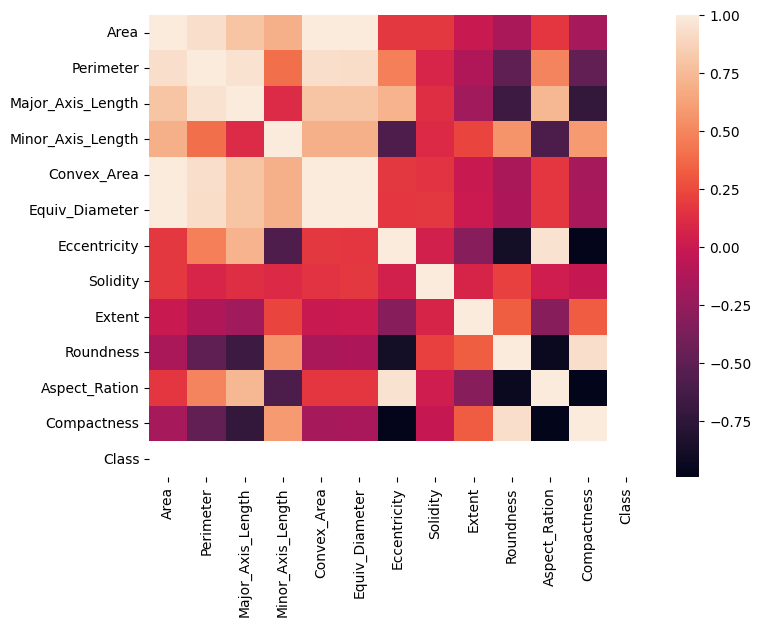

In [23]:
#numeric_columns = train_file.select_dtypes(include=[np.number]).columns
numeric_columns = train_file.columns
train_file_numeric = train_file[numeric_columns]


# Calculate the correlation matrix
correlation_matrix = train_file_numeric.corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.heatmap(correlation_matrix)
plt.show()

# Drop irrelevant columns
after dropping irrelevant column save features in X_train as a 2D array where columns correspond to feature.
convert all datatype to Float to avoid error and loss of data during calculations and scale down.


In [7]:
columns_to_drop = ['Convex_Area','Equiv_Diameter','Compactness','Class','Perimeter','Aspect_Ration']
columns = test_file.columns
columns = [item for item in columns if item not in columns_to_drop]

# Define the target column
y_columns = "Class"
x_columns = columns
print(f"Y = {y_columns}")
print(f"Features retained = {x_columns}")

x_train = train_file[x_columns].values        #store features as array of n dimension(n = number of feature)
y_train = train_file[y_columns].values
x_test = test_file[x_columns].values        
y_test = test_file[y_columns].values

x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)

Y = Class
Features retained = ['Area', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Solidity', 'Extent', 'Roundness']


# Scale down
## using Z scale 
-> X = (X - Mean(X))/ standard deviation(X)
scale down both test and train data for uniformity.
No need to scale down y_train and y_test as they need to retain binary values


In [8]:
m = x_train.shape[1]
for i in range(m):      #scale down(Z scale) (x-mean)/st.deviation
 x_train[:,i] = (x_train[:,i] - np.mean(x_train[:,i]))/np.std(x_train[:,i])
 
m = x_test.shape[1]
for i in range(m):  
 x_test[:,i] = (x_test[:,i] - np.mean(x_test[:,i]))/np.std(x_test[:,i])

## Initialize values

In [24]:
#initialise  {initialise w to zero array with elements equal to number of features..ie. column}
w = np.zeros(m)
b = 0
a = 0.001
ite = 6000

# Define Functions
## Linear function
defined as F = w*x + b 
## Sigmoid function
defined as f = 1/(1+e^-z)

In [25]:
def function(w,b,x):
    f = np.dot(x,w)+b
    return f

def sigmoid_function(z):
    z = np.clip(z, -500, 500) 
    return 1/(1+math.exp(-z))

## Cost function
using the simplified expression
## Gradient Descent 
dot product used to decrease time taken

In [26]:
def cost_function(w,b,x,y):
    n = len(y)
    sum = 0
    for i in range(n):
        z= function(w,b,x[i])
        sum = np.sum(y[i]*math.log(sigmoid_function(z)) + (1-y[i])*math.log(sigmoid_function(z)))
    return (-1/n)* sum


def gradient_descent(w, b, x, y, a, iteration):   
    for j in range(iteration):
        dj_dw = np.zeros_like(w)  # Initialize gradient for w
        dj_db = 0  # Initialize gradient for b
        
        z = function(w,b,x[i])
        F = sigmoid_function(z)
        dj_dw += np.dot((F - y),x)  
        dj_db += F - y[i]  
      
        w = w - (1/m) * a * dj_dw
        b = b - (1/m) * a * dj_db
        
        # Compute and save the cost for the current iteration
    return w, b, 

In [27]:
# Run gradient descent aldorithm for ite no of iterations 
w, b = gradient_descent(w, b, x_train, y_train, a, ite)

# Final output
print("\nOUTPUT\n")
print(f"Final value of Weights = {w},\nBias = {b}\nLearning Rate = {a}\nItirations = {ite}")



OUTPUT

Final value of Weights = [ 146.72787394  477.00392205 -338.78118145  599.03192744  102.22675747
 -183.90734588 -566.74814768],
Bias = -0.00029613095032686535
Learning Rate = 0.001
Itirations = 6000


# Accuracy of model
Find accuracy of model against test and train data. Pridiction will be 1 if sigmoid function has value grater than 0.5. Kepping 0.5 as refernce line 

In [28]:
def pridiction(probabality):
    return 1 if probabality>= 0.5 else 0

In [29]:
n = len(y_train)
correct = 0
for i in range(n):
    if pridiction(sigmoid_function(function(w,b,x_train[i]))) == y_train[i]:
        correct += 1
accuracy = 100 * correct/n
print("accuracy of model for train data= ",accuracy)

n = len(y_test)
correct = 0
for i in range(n):
    if pridiction(sigmoid_function(function(w,b,x_test[i]))) == y_test[i]:
        correct += 1
accuracy = 100 * correct/n
print("accuracy of model for test data = ",accuracy)

accuracy of model for train data=  85.4
accuracy of model for test data =  86.4
